## Set vs List

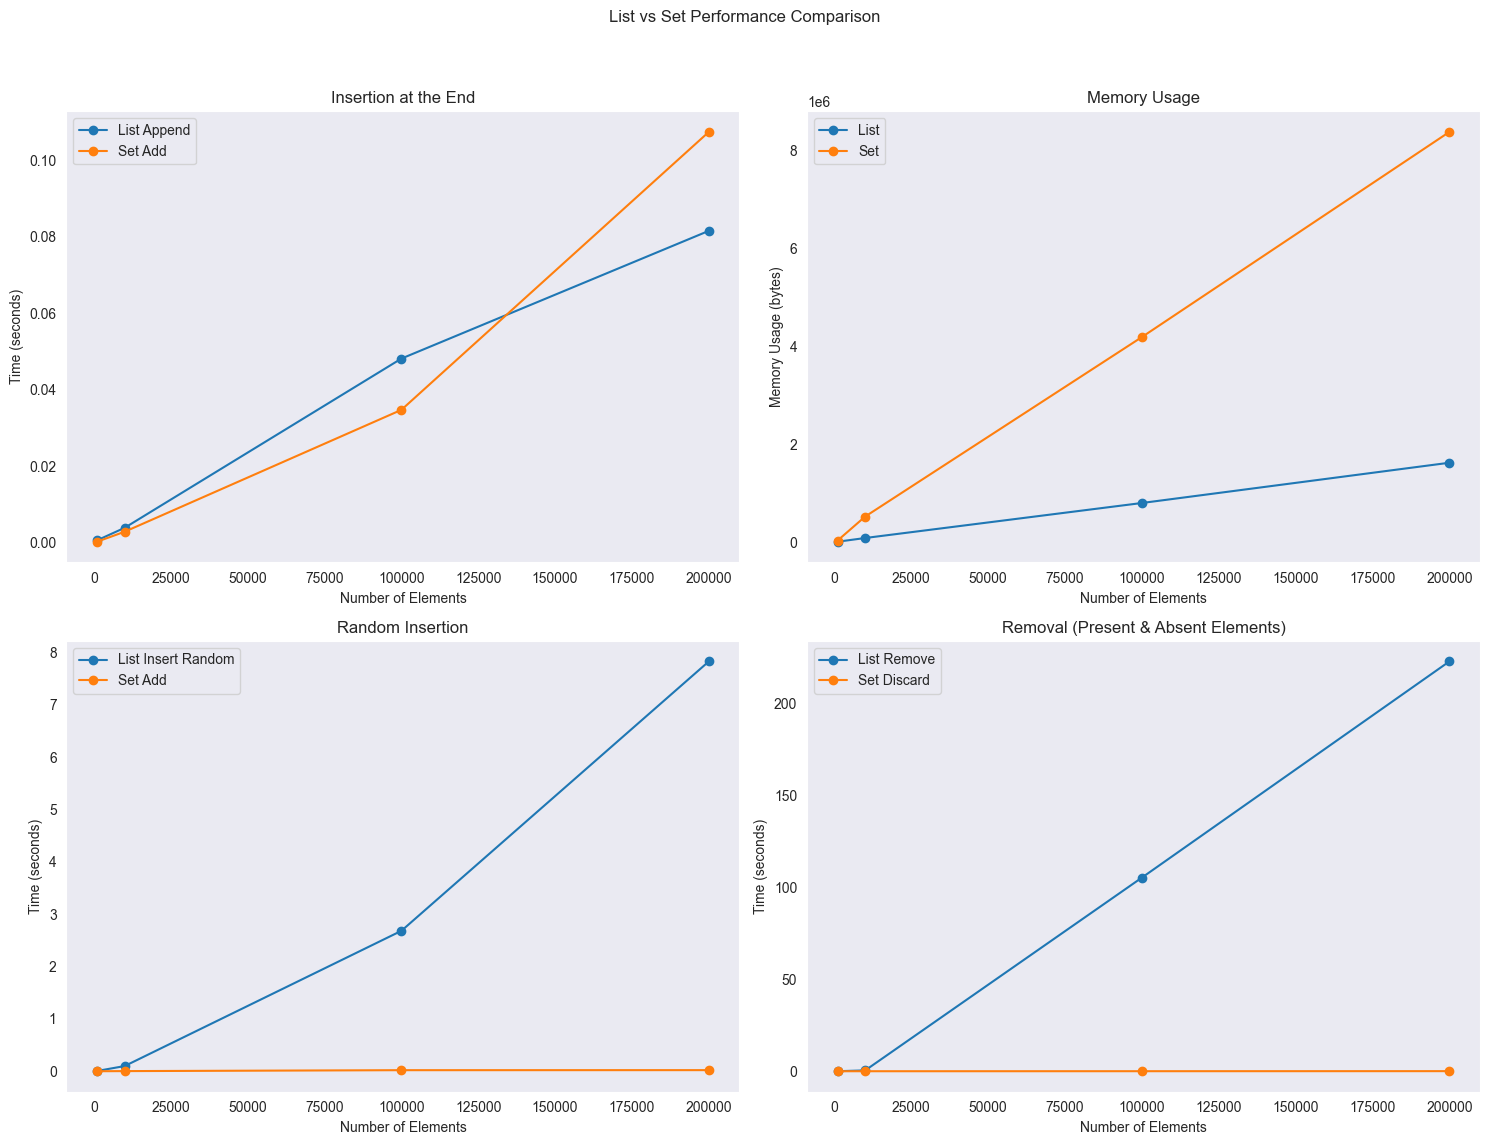

In [29]:
import timeit
import random
import sys
import matplotlib.pyplot as plt

# Test sizes
sizes = [1000, 10000, 100000, 200000]

# Function to measure memory usage of list and set
def get_memory_usage(collection):
    return sys.getsizeof(collection)

# 1. Test Insertion at the end
insert_time_list = []
insert_time_set = []
memory_usage_list = []
memory_usage_set = []

for size in sizes:
    # Generate data
    data = list(range(size))

    # Measure insertion time for list
    test_list = []
    start = timeit.default_timer()
    for i in data:
        test_list.append(i)
    end = timeit.default_timer()
    insert_time_list.append(end - start)
    memory_usage_list.append(get_memory_usage(test_list))

    # Measure insertion time for set
    test_set = set()
    start = timeit.default_timer()
    for i in data:
        test_set.add(i)
    end = timeit.default_timer()
    insert_time_set.append(end - start)
    memory_usage_set.append(get_memory_usage(test_set))

# 2. Test Insertion at a random position for list, end for set
random_insert_time_list = []
random_insert_time_set = []

for size in sizes:
    # Generate data
    data = list(range(size))

    # Measure random insertion time for list
    test_list = []
    start = timeit.default_timer()
    for i in data:
        test_list.insert(random.randint(0, len(test_list)), i)
    end = timeit.default_timer()
    random_insert_time_list.append(end - start)

    # Measure insertion time for set (add to end, as set has no random insertion)
    test_set = set()
    start = timeit.default_timer()
    for i in data:
        test_set.add(i)
    end = timeit.default_timer()
    random_insert_time_set.append(end - start)

# 3. Test Removal of elements (where item may or may not exist)
remove_time_list = []
remove_time_set = []
for size in sizes:
    # Generate data
    data = list(range(size * 2))  # Initial data with double elements
    test_list = list(data)
    test_set = set(data)

    # Select some items that may or may not be in the collection
    elements_to_remove = [random.choice(data) for _ in range(size // 10)]
    elements_to_remove += [size * 2 + 1] * (size // 10)  # Non-existing elements

    # Measure removal time for list
    start = timeit.default_timer()
    for elem in elements_to_remove:
        if elem in test_list:
            test_list.remove(elem)
    end = timeit.default_timer()
    remove_time_list.append(end - start)

    # Measure removal time for set
    start = timeit.default_timer()
    for elem in elements_to_remove:
        test_set.discard(elem)
    end = timeit.default_timer()
    remove_time_set.append(end - start)

# Plotting results
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("List vs Set Performance Comparison")

# Insertion at the end
axs[0, 0].plot(sizes, insert_time_list, label="List Append", marker='o')
axs[0, 0].plot(sizes, insert_time_set, label="Set Add", marker='o')
axs[0, 0].set_title("Insertion at the End")
axs[0, 0].set_xlabel("Number of Elements")
axs[0, 0].set_ylabel("Time (seconds)")
axs[0, 0].legend()
axs[0, 0].grid()

# Memory Usage
axs[0, 1].plot(sizes, memory_usage_list, label="List", marker='o')
axs[0, 1].plot(sizes, memory_usage_set, label="Set", marker='o')
axs[0, 1].set_title("Memory Usage")
axs[0, 1].set_xlabel("Number of Elements")
axs[0, 1].set_ylabel("Memory Usage (bytes)")
axs[0, 1].legend()
axs[0, 1].grid()

# Random Insertion
axs[1, 0].plot(sizes, random_insert_time_list, label="List Insert Random", marker='o')
axs[1, 0].plot(sizes, random_insert_time_set, label="Set Add", marker='o')
axs[1, 0].set_title("Random Insertion")
axs[1, 0].set_xlabel("Number of Elements")
axs[1, 0].set_ylabel("Time (seconds)")
axs[1, 0].legend()
axs[1, 0].grid()

# Removal
axs[1, 1].plot(sizes, remove_time_list, label="List Remove", marker='o')
axs[1, 1].plot(sizes, remove_time_set, label="Set Discard", marker='o')
axs[1, 1].set_title("Removal (Present & Absent Elements)")
axs[1, 1].set_xlabel("Number of Elements")
axs[1, 1].set_ylabel("Time (seconds)")
axs[1, 1].legend()
axs[1, 1].grid()

plt.tight_layout(rect=(0, 0.03, 1, 0.95))
plt.show()